In [23]:
import os
import mne
import matplotlib.pyplot as plt

In [2]:
data_dir = "/home/tidiane/dev/bsd_lab/psid/data"
exp_idx = 1

In [31]:
epochs = mne.read_epochs(os.path.join(data_dir,"VP" + str(exp_idx) + "_epo.fif"))

Reading /home/tidiane/dev/bsd_lab/psid/data/VP1_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    9010.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated


In [26]:
#epochs = epochs.pick_channels(["stim"])

In [34]:
epochs

Number of events,120
Events,11: 2012: 2013: 2014: 2015: 2016: 20
Time range,-2.000 – 9.010 sec
Baseline,-2.000 – 0.000 sec


In [ ]:
from braindecode.datasets import (
    create_from_mne_raw, create_from_mne_epochs)

In [27]:
windows_dataset = create_from_mne_epochs(
    [epochs],
    window_size_samples=50,
    window_stride_samples=50,
    drop_last_window=False
)

windows_dataset.description


Creating RawArray with float64 data, n_channels=1, n_times=3304
    Range : 0 ... 3303 =      0.000 ...    11.010 secs
Ready.
Adding metadata with 4 columns
67 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 67 events and 50 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=1, n_times=3304
    Range : 0 ... 3303 =      0.000 ...    11.010 secs
Ready.
Adding metadata with 4 columns
67 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 67 events and 50 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=1, n_times=3304
    Range : 0 ... 3303 =      0.000 ...    11.010 secs
Ready.
Adding metadata with 4 columns
67 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 67 events and 50 original time points ...
0 ba

,0
0,None
1,None
2,None
3,None
4,None
...,...
115,None
116,None
117,None
118,None


In [28]:
windows_dataset[0][0][0]

Using data from preloaded Raw for 1 events and 50 original time points ...


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
      dtype=float32)

Using data from preloaded Raw for 1 events and 50 original time points ...
Using data from preloaded Raw for 1 events and 50 original time points ...
Using data from preloaded Raw for 1 events and 50 original time points ...


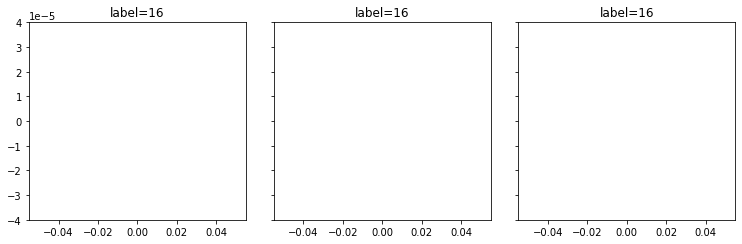

In [29]:
max_i = 2
fig, ax_arr = plt.subplots(1, max_i + 1, figsize=(3.5 * (max_i + 1), 3.5),
                           sharex=True, sharey=True)
for i, (x, y, window_ind) in enumerate(windows_dataset):
    ax_arr[i].plot(x.T)
    ax_arr[i].set_ylim(-4e-5, 4e-5)
    ax_arr[i].set_title(f"label={y}")
    if i == max_i:
        break

fig.tight_layout()